In [1]:
import pandas as pd

# Data Reading 

In [2]:
df = pd.read_csv('Downloads/advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Inspection

In [4]:
df.shape


(200, 4)

In [5]:
df.ndim

2

In [6]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().values.sum()

0

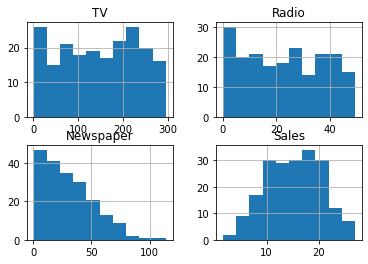

In [9]:
histo = df.hist()

In [10]:
import matplotlib.pyplot as plt

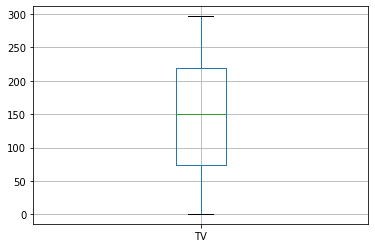

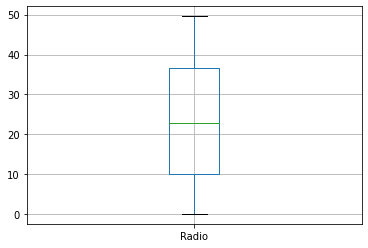

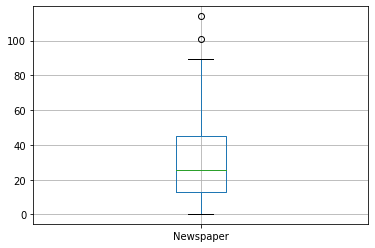

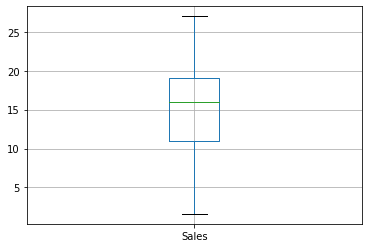

In [11]:
for coloum in df:
    
    plt.figure()
    df.boxplot([coloum])

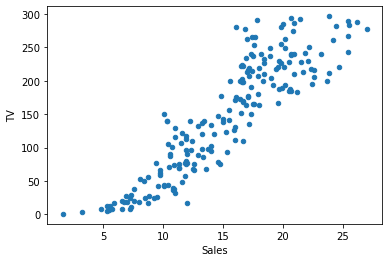

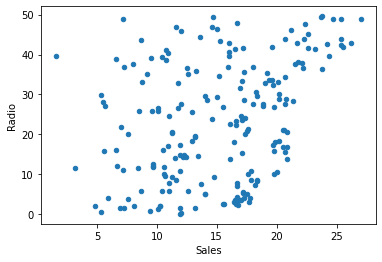

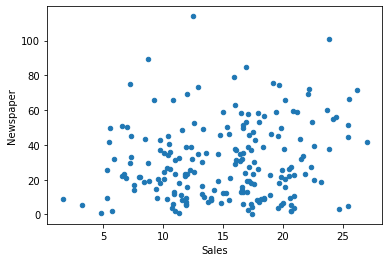

In [12]:
df.plot(kind = 'scatter', x ='Sales', y = 'TV' )
df.plot(kind = 'scatter', x ='Sales', y = 'Radio' )
df.plot(kind = 'scatter', x ='Sales', y = 'Newspaper' )
plt.show()

In [13]:
import seaborn as sb

In [14]:
corr = df.corr()

<AxesSubplot:>

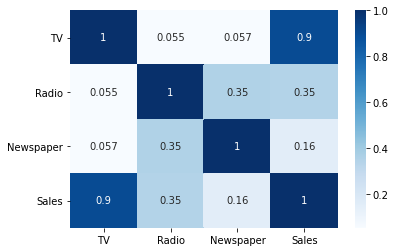

In [15]:
sb.heatmap(corr, cmap="Blues", annot=True)

In [16]:
rows, cols = df.shape

In [17]:
flds = list(df.columns)

In [18]:
# correlation matrix to array

In [19]:
s = df.corr().values

In [20]:
s

array([[1.        , 0.05480866, 0.05664787, 0.90120791],
       [0.05480866, 1.        , 0.35410375, 0.3496311 ],
       [0.05664787, 0.35410375, 1.        , 0.15796003],
       [0.90120791, 0.3496311 , 0.15796003, 1.        ]])

In [21]:
for i in range(cols):
    for j in range(i+1, cols):
        if s[i,j] >.70:
            print(s[i,j], i, j)
        

0.9012079133023307 0 3


In [22]:
X = df['TV']
y = df['Sales']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
import statsmodels.api as sm

In [26]:
X_train_intercept = sm.add_constant(X_train)

In [27]:
linearreg = sm.OLS(y_train, X_train_intercept).fit()

In [28]:
linearreg.params

const    6.948683
TV       0.054546
dtype: float64

In [29]:
print(linearreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.52e-52
Time:                        21:06:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

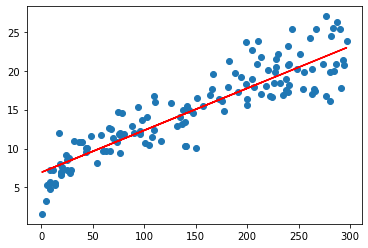

In [30]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [31]:
X_test_sm = sm.add_constant(X_test)

In [33]:
y_pred = linearreg.predict(X_test_sm)

In [34]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

In [39]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

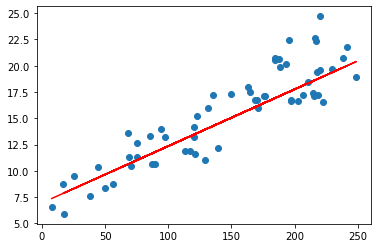

In [40]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()